#                                  London House Price Prediction 

## Table of Contents

##  DATA PREPERATION
### Step 1 : Loading the libraries 
### Step 2 : Loading the dataset
### Step 3 : Cleaning the dataset
#### Step 3.1 : Converting price to millions
#### Step 3.2 : Dropping two columns
#### Step 3.3 : Comparing Price to other metrics
#### Step 3.4 : Handling Null values

## DATA DERIVATION
### Step 4 : Feature Engineering
#### Step 4.1 : Removing houses with high counts of bedroom
#### Step 4.2 : Calculation the price per SQFT
#### Step 4.3 : Stripping the Location name using Lambda fucntion
#### Step 4.4 : Change name of scacre location to 'Others'
#### Step 4.5 : Remvoing houses which dont have bedroom for atleast 250 sq ft
#### Step 4.6 : Removing the outliers one standard deviation from the mean
#### Step 4.7 : Removing houses with irregular area.
#### Step 4.8 : Removing various other columns for model building

## CONSTRUCTION OF MODELS
### Step 5 :  Creating Dummies for the location
### Step 6 : Model Building
#### Step 6.1 : Splitting Training set and test set
#### Step 6.2 : Linear Regression
#### Step 6.3 : Decision tree Regressor
#### Step 6.4 : Lasso Regression

## Validation of Results 
### Step 7 : K fold cross Validation
### Step 8 : Hyperparameter Tuning - GridSearch
### Step 9 : Comparing Original and Predicted data

## Deployment 
### Step 10 : Model Deployment using the best model.

# .

### Step 1 : Loading the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Step 2 : Loading the dataset

In [2]:
import os
working_directory = os.getcwd()
path  = working_directory + '/London_housingdata_copy.csv'
df = pd.read_csv(path)



In [3]:
df.head()

,Unnamed: 0,Property Name,Price,House Type,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5.0,5.0,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2.0,2.0,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2.0,2.0,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4.0,4.0,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2.0,2.0,Putney,London,SW15 1PL


In [4]:
df.shape

(3480, 10)

### Heatmap 

<AxesSubplot:>

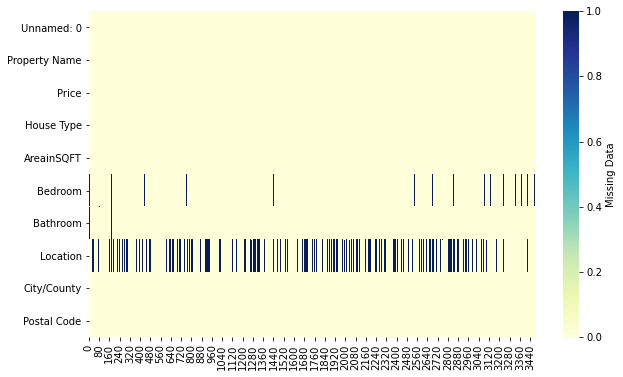

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            
            cbar_kws={'label': 'Missing Data'})
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

### Step 3 : Cleaning the dataset

In [6]:
df.groupby("Property Name")["Property Name"].agg("count")

Property Name
1 Eastfields Avenue    1
10 Park Drive          3
17 Lillie Square       7
23 Maud Street         1
28 Narrow Street       1
                      ..
Youngs Court           1
Yukon Road             1
Yvon House             2
Ziggurat Building      1
Zulu Mews              1
Name: Property Name, Length: 2380, dtype: int64

In [7]:
df.groupby("Location")["Location"].agg("count")

Location
 161 Millbank            1
 35 Salusbury Road       1
 352 Queenstown Road     1
 372 Queenstown Road     1
 50 Shad Thames          1
                        ..
Winchester Road          1
Windsor Street           1
Woodberry Grove          1
Woodford Green          12
Woodstock Road           1
Name: Location, Length: 679, dtype: int64

### Step 3.1 : Converting price to millions

### For easy intrepretation we convert the price to millions. 

In [8]:
df["price_in_million"]=df["Price"]/[1000000]
df.head()

,Unnamed: 0,Property Name,Price,House Type,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million
0,0,Queens Road,1675000,House,2716,5.0,5.0,Wimbledon,London,SW19 8NY,1.675
1,1,Seward Street,650000,Flat / Apartment,814,2.0,2.0,Clerkenwell,London,EC1V 3PA,0.650
2,2,Hotham Road,735000,Flat / Apartment,761,2.0,2.0,Putney,London,SW15 1QL,0.735
3,3,Festing Road,1765000,House,1986,4.0,4.0,Putney,London,SW15 1LP,1.765
4,4,Spencer Walk,675000,Flat / Apartment,700,2.0,2.0,Putney,London,SW15 1PL,0.675


In [9]:
df["House Type"].unique()

array(['House', 'Flat / Apartment', 'New development', 'Duplex',
       'Penthouse', 'Studio', 'Bungalow', 'Mews'], dtype=object)

In [10]:
Housetype_stats=df.groupby("House Type")["House Type"].agg("count").sort_values(ascending=False)
print(Housetype_stats)

House Type
Flat / Apartment    1565
House               1430
New development      357
Penthouse            100
Studio                10
Bungalow               9
Duplex                 7
Mews                   2
Name: House Type, dtype: int64


### Step 3.2 : Dropping two columns

### Since in this project we are taking a overlaying approach of predictig the average house prices we drop the House Type and we will take care of the outliers in the later stage.


In [11]:
df1=df.drop(["Unnamed: 0","House Type" ],axis="columns")
df1.head()

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million
0,Queens Road,1675000,2716,5.0,5.0,Wimbledon,London,SW19 8NY,1.675
1,Seward Street,650000,814,2.0,2.0,Clerkenwell,London,EC1V 3PA,0.650
2,Hotham Road,735000,761,2.0,2.0,Putney,London,SW15 1QL,0.735
3,Festing Road,1765000,1986,4.0,4.0,Putney,London,SW15 1LP,1.765
4,Spencer Walk,675000,700,2.0,2.0,Putney,London,SW15 1PL,0.675


In [12]:
df1.shape

(3480, 9)

In [13]:
df1.describe()

,Price,AreainSQFT,Bedroom,Bathroom,price_in_million
count,3.480000e+03,3480.000000,3407.000000,3471.000000,3480.000000
mean,1.864173e+06,1712.973563,3.104784,3.101988,1.864173
std,2.267283e+06,1364.259351,1.520036,1.518559,2.267283
min,1.800000e+05,274.000000,0.000000,0.000000,0.180000
25%,7.500000e+05,834.000000,2.000000,2.000000,0.750000
50%,1.220000e+06,1310.000000,3.000000,3.000000,1.220000
75%,2.150000e+06,2157.250000,4.000000,4.000000,2.150000
max,3.975000e+07,15405.000000,10.000000,10.000000,39.750000


### Step 3.3 : Comparing Price to other metrics

### Confusion Matrix 

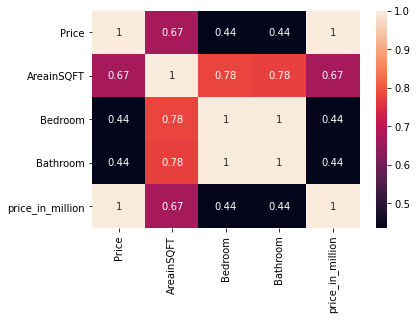

In [14]:
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Comparing the Prices to Area

<AxesSubplot:xlabel='price_in_million'>

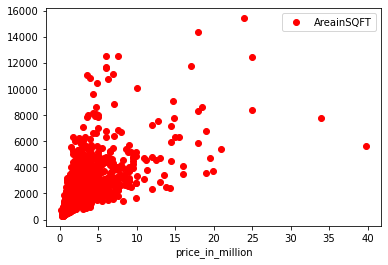

In [15]:
df1.plot(x='price_in_million', y='AreainSQFT', style='o' ,  color = "red")

## Comparing the Prices to Area

<AxesSubplot:xlabel='price_in_million'>

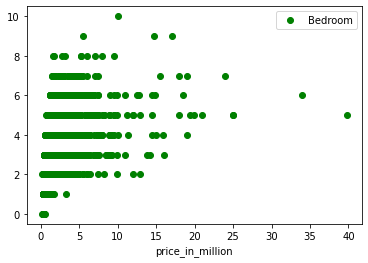

In [16]:
df1.plot(x='price_in_million', y='Bedroom', style='o' ,  color = "green")

In [17]:
Locationtype_stats=df1.groupby("Location")["Location"].agg("count").sort_values(ascending=False)
print(Locationtype_stats)

Location
Putney                   97
Wandsworth               77
Barnes                   71
Wimbledon                69
Esher                    64
                         ..
35 Pembroke Road          1
35 Kensington Court       1
348 Queenstown Road       1
34-37 Beaumont Street     1
Woodstock Road            1
Name: Location, Length: 679, dtype: int64


## Comparing the Location density

<AxesSubplot:ylabel='Location'>

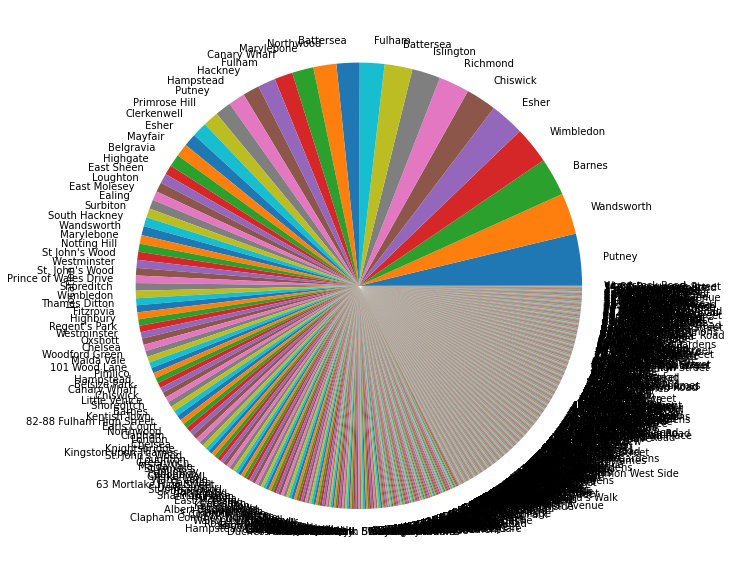

In [18]:
Locationtype_stats.plot(kind='pie',figsize=(10,50))

## Step 3.4 : Handling Null values

In [19]:
df1.isnull().sum()

Property Name         0
Price                 0
AreainSQFT            0
Bedroom              73
Bathroom              9
Location            902
City/County           0
Postal Code           0
price_in_million      0
dtype: int64

<AxesSubplot:>

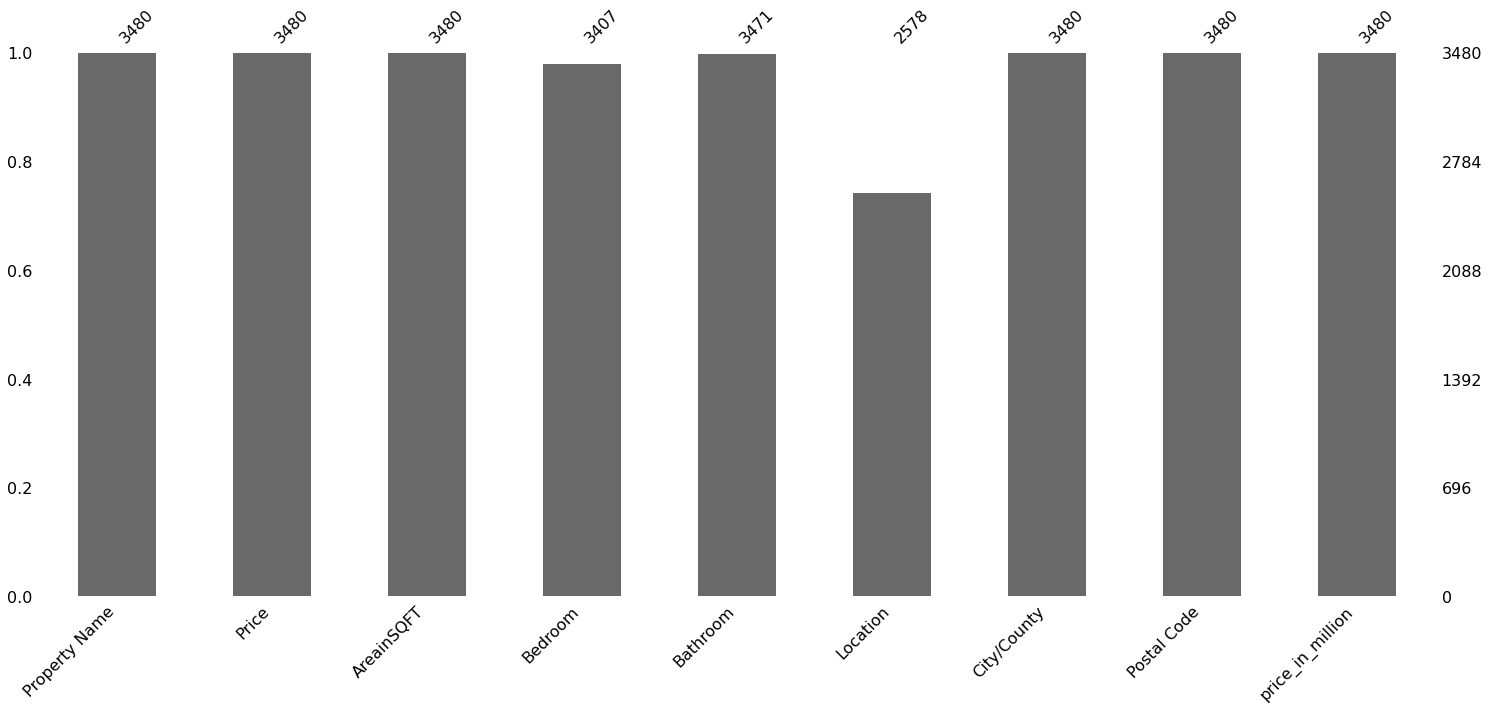

In [20]:

import missingno as msno
  

  
# values as a bar chart
msno.bar(df1)


In [21]:
df1.dtypes[df1.dtypes!= "object"]

Price                 int64
AreainSQFT            int64
Bedroom             float64
Bathroom            float64
price_in_million    float64
dtype: object

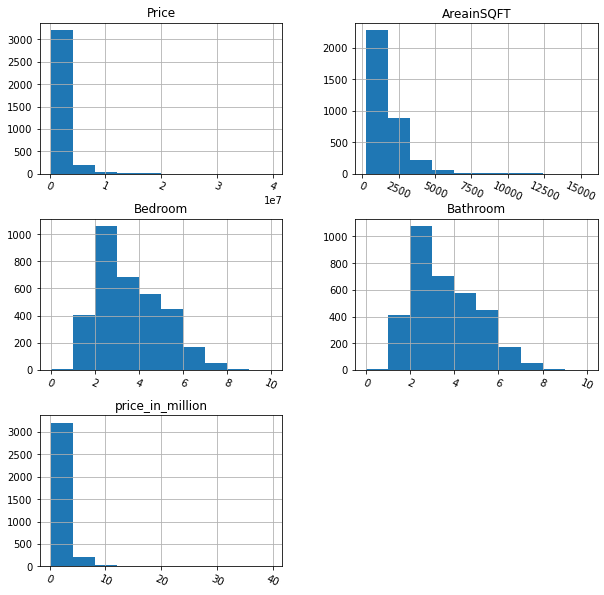

In [22]:
df1.hist(figsize=(10,10), xrot=-25)
plt.ticklabel_format(style='plain')


<AxesSubplot:xlabel='price_in_million'>

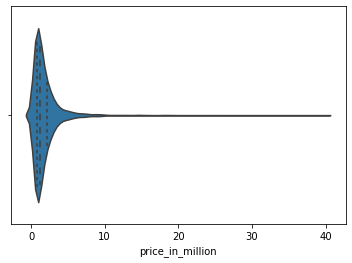

In [23]:
sns.violinplot(data=df1, x="price_in_million" , fmt = "g",plit=True, inner="quartile",)



### Since the null values are scarce we drop the same


In [24]:
df2 = df1.dropna()
df2.shape

(2532, 9)

In [25]:
df2.head()

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million
0,Queens Road,1675000,2716,5.0,5.0,Wimbledon,London,SW19 8NY,1.675
1,Seward Street,650000,814,2.0,2.0,Clerkenwell,London,EC1V 3PA,0.650
2,Hotham Road,735000,761,2.0,2.0,Putney,London,SW15 1QL,0.735
3,Festing Road,1765000,1986,4.0,4.0,Putney,London,SW15 1LP,1.765
4,Spencer Walk,675000,700,2.0,2.0,Putney,London,SW15 1PL,0.675


In [26]:
df2.isnull().sum()

Property Name       0
Price               0
AreainSQFT          0
Bedroom             0
Bathroom            0
Location            0
City/County         0
Postal Code         0
price_in_million    0
dtype: int64

In [27]:
df2.head()

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million
0,Queens Road,1675000,2716,5.0,5.0,Wimbledon,London,SW19 8NY,1.675
1,Seward Street,650000,814,2.0,2.0,Clerkenwell,London,EC1V 3PA,0.650
2,Hotham Road,735000,761,2.0,2.0,Putney,London,SW15 1QL,0.735
3,Festing Road,1765000,1986,4.0,4.0,Putney,London,SW15 1LP,1.765
4,Spencer Walk,675000,700,2.0,2.0,Putney,London,SW15 1PL,0.675


## Step 4 : Feature Engineering

In [28]:
df2["Bedroom"].unique()

array([ 5.,  2.,  4.,  1.,  3.,  6.,  0., 10.,  7.,  8.,  9.])

### Step 4.1 : Removing houses with high counts of bedroom

###  As 7 Bedooms is high number for an ideal home we shall remove the houses with more than 7 bedrooms to create a perfect model.

In [29]:
df2[df2.Bedroom>7]

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million
43,Old Battersea House,9975000,10100,10.0,10.0,Battersea,London,SW11 3LD,9.975000
224,Harper Lane,1650000,4016,8.0,8.0,Radlett,Hertfordshire,WD7 9HJ,1.650000
800,Upper Park Road,5250000,3782,8.0,8.0,Belsize Park,London,NW3 2UP,5.250000
1818,Parkside Avenue,8000000,6713,8.0,8.0,Wimbledon,London,SW19 5ES,8.000000
2619,Courtenay Avenue,16999999,11733,9.0,9.0,Highgate,London,N6 4LR,16.999999
2687,Christchurch Road,7000000,6388,8.0,8.0,East Sheen,London,SW14 7AN,7.000000
3063,Macaulay Road,5950000,6776,8.0,8.0,Clapham,London,SW4 0QX,5.950000
3282,Manor Road,2800000,4378,8.0,8.0,Chigwell,Essex,IG7 5PQ,2.800000
3336,Bryanston Mews West,5250000,3108,8.0,8.0,Marylebone,London,W1H 2BW,5.250000
3394,Upper Wimpole Street,14750000,9053,9.0,9.0,Marylebone,London,W1G 6LG,14.750000


In [30]:
df2[df2.Bedroom>7].head(10)

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million
43,Old Battersea House,9975000,10100,10.0,10.0,Battersea,London,SW11 3LD,9.975000
224,Harper Lane,1650000,4016,8.0,8.0,Radlett,Hertfordshire,WD7 9HJ,1.650000
800,Upper Park Road,5250000,3782,8.0,8.0,Belsize Park,London,NW3 2UP,5.250000
1818,Parkside Avenue,8000000,6713,8.0,8.0,Wimbledon,London,SW19 5ES,8.000000
2619,Courtenay Avenue,16999999,11733,9.0,9.0,Highgate,London,N6 4LR,16.999999
2687,Christchurch Road,7000000,6388,8.0,8.0,East Sheen,London,SW14 7AN,7.000000
3063,Macaulay Road,5950000,6776,8.0,8.0,Clapham,London,SW4 0QX,5.950000
3282,Manor Road,2800000,4378,8.0,8.0,Chigwell,Essex,IG7 5PQ,2.800000
3336,Bryanston Mews West,5250000,3108,8.0,8.0,Marylebone,London,W1H 2BW,5.250000
3394,Upper Wimpole Street,14750000,9053,9.0,9.0,Marylebone,London,W1G 6LG,14.750000


#### Negating the same 

In [31]:
df2 = df2[~(df2.Bedroom>7)]
df2.shape

(2521, 9)

### Step 4.2 : Calculation the price per SQFT

### For easy interpretation we calculate the Price in Sqft

In [32]:
df2.AreainSQFT.unique()

array([2716,  814,  761, ..., 3698, 4435, 1506])

In [33]:
df3 = df2.copy()

In [34]:
df3.head()

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million
0,Queens Road,1675000,2716,5.0,5.0,Wimbledon,London,SW19 8NY,1.675
1,Seward Street,650000,814,2.0,2.0,Clerkenwell,London,EC1V 3PA,0.650
2,Hotham Road,735000,761,2.0,2.0,Putney,London,SW15 1QL,0.735
3,Festing Road,1765000,1986,4.0,4.0,Putney,London,SW15 1LP,1.765
4,Spencer Walk,675000,700,2.0,2.0,Putney,London,SW15 1PL,0.675


In [35]:
df3["price_per_sqft"]=df["Price"]/df2["AreainSQFT"]

df3.head()

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million,price_per_sqft
0,Queens Road,1675000,2716,5.0,5.0,Wimbledon,London,SW19 8NY,1.675,616.715758
1,Seward Street,650000,814,2.0,2.0,Clerkenwell,London,EC1V 3PA,0.650,798.525799
2,Hotham Road,735000,761,2.0,2.0,Putney,London,SW15 1QL,0.735,965.834428
3,Festing Road,1765000,1986,4.0,4.0,Putney,London,SW15 1LP,1.765,888.721047
4,Spencer Walk,675000,700,2.0,2.0,Putney,London,SW15 1PL,0.675,964.285714


### Step 4.3 : Stripping the Location name using Lamda fucntion

#### Since some location names are merged together we use the lambda function to strip into identifiable names 

In [36]:
len(df3.Location.unique())

667

In [37]:
df3.Location.apply(lambda x:x.strip())

0                     Wimbledon
1                   Clerkenwell
2                        Putney
3                        Putney
4                        Putney
                 ...           
3474               Queen's gate
3475                     Fulham
3476                 St James's
3477    Hampstead Garden Suburb
3478                    Mayfair
Name: Location, Length: 2521, dtype: object

### Step 4.4 : Change name of scare location to 'Others'

In [38]:
Location_stats=df3.groupby("Location")["Location"].agg("count").sort_values(ascending=False)
print(Location_stats)

Location
Putney                 96
Wandsworth             77
Barnes                 71
Wimbledon              68
Esher                  62
                       ..
350 The Highway         1
35 Pembroke Road        1
35 Kensington Court     1
348 Queenstown Road     1
Woodstock Road          1
Name: Location, Length: 667, dtype: int64


### To prevent outliers, we shall consider the locations where there are instances less than or equal to 5 as 'Others'

In [39]:
len(Location_stats[Location_stats<=5])

579

In [40]:
Location_stats_less_than_5=Location_stats[Location_stats<=5]
Location_stats_less_than_5

Location
St. James's                  5
Brook Green                  5
Albert Bridge Road           5
Acton                        5
Clapham Common North Side    5
                            ..
350 The Highway              1
35 Pembroke Road             1
35 Kensington Court          1
348 Queenstown Road          1
Woodstock Road               1
Name: Location, Length: 579, dtype: int64

In [41]:
len(df3.Location.unique())

667

In [42]:
df3.Location=df3.Location.apply(lambda x:"other" if x in Location_stats_less_than_5 else x)

len(df3.Location.unique())

89

In [43]:
df3.head(15)

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million,price_per_sqft
0,Queens Road,1675000,2716,5.0,5.0,Wimbledon,London,SW19 8NY,1.675,616.715758
1,Seward Street,650000,814,2.0,2.0,Clerkenwell,London,EC1V 3PA,0.650,798.525799
2,Hotham Road,735000,761,2.0,2.0,Putney,London,SW15 1QL,0.735,965.834428
3,Festing Road,1765000,1986,4.0,4.0,Putney,London,SW15 1LP,1.765,888.721047
4,Spencer Walk,675000,700,2.0,2.0,Putney,London,SW15 1PL,0.675,964.285714
5,Craven Hill Gardens,420000,403,1.0,1.0,other,London,W2 3EA,0.420,1042.183623
6,Alfriston Road,1475000,1548,4.0,4.0,Battersea,London,SW11 6NW,1.475,952.842377
7,Bishops Gate,650000,560,1.0,1.0,Fulham,London,SW6 3LF,0.650,1160.714286
8,Adam & Eve Mews,2500000,1308,3.0,3.0,other,London,W8 6UG,2.500,1911.314985
9,Hornton Street,925000,646,2.0,2.0,other,London,W8 4NT,0.925,1431.888545


In [44]:
len(df3.Location.unique())

89

In [45]:
Location_stats=df3.groupby("Location")["Location"].agg("count").sort_values(ascending=False)
print(Location_stats)

Location
other            810
Putney            96
Wandsworth        77
Barnes            71
Wimbledon         68
                ... 
Kensington         6
 Ealing            6
 Islington         6
 East Molesey      6
 Coulsdon          6
Name: Location, Length: 89, dtype: int64


<AxesSubplot:ylabel='Location'>

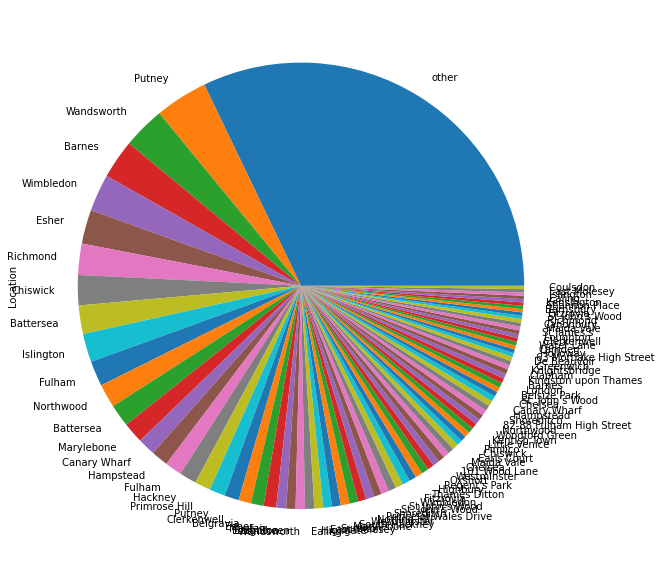

In [46]:
Location_stats.plot(kind='pie',figsize=(10,50))

### Step 4.5 : Remvoing houses which dont have bedroom for atleast 250 sq ft

In [47]:
df4 = df3.copy()

### As an ideal house of  250 squarefeet should have one bedroom at least.If houses having at least a bedroom for every 250 sqft we accept otherwise we shall reject the same and remove from the data

In [48]:
df4[df4.AreainSQFT/df4.Bedroom<250].head() 

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million,price_per_sqft
463,Disraeli Road,1295000,876,4.0,4.0,Putney,London,SW15 2DS,1.295,1478.310502
1909,Samford House,525000,779,4.0,4.0,other,London,N1 0JF,0.525,673.940950
2362,Landmark Court,550000,469,2.0,2.0,Marylebone,London,NW1 6SL,0.550,1172.707889
2656,St. George's Drive,650000,458,2.0,2.0,Pimlico,London,SW1V 4DJ,0.650,1419.213974
3041,Broomwood Road,600000,736,3.0,3.0,Wandsworth,London,SW11 6JF,0.600,815.217391


In [49]:
df4.shape

(2521, 10)

#### We shall negate the same

In [50]:
df5 = df4[~(df4.AreainSQFT/df4.Bathroom<250)]
df5.shape

(2514, 10)

In [51]:
df5.describe()

,Price,AreainSQFT,Bedroom,Bathroom,price_in_million,price_per_sqft
count,2.514000e+03,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,1.865896e+06,1743.635243,3.091488,3.091488,1.865896,1057.441411
std,2.289145e+06,1411.670875,1.505654,1.505654,2.289145,582.026929
min,1.800000e+05,274.000000,0.000000,0.000000,0.180000,241.610738
25%,7.250000e+05,834.000000,2.000000,2.000000,0.725000,717.347765
50%,1.200000e+06,1308.000000,3.000000,3.000000,1.200000,907.429083
75%,2.250000e+06,2206.500000,4.000000,4.000000,2.250000,1196.042230
max,3.975000e+07,15405.000000,7.000000,7.000000,39.750000,7069.180153


In [52]:
df5.price_per_sqft.describe()

count    2514.000000
mean     1057.441411
std       582.026929
min       241.610738
25%       717.347765
50%       907.429083
75%      1196.042230
max      7069.180153
Name: price_per_sqft, dtype: float64

### Step 4.6 : Removing the outliers one standard deviation from the mean

### Removing the outliers which are one startdard deviation away from the mean to create a normal distrubution 

In [53]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("Location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [54]:
df6 = remove_pps_outliers(df5)
df6.shape

(1866, 10)

### Step 4.7 : Removing houses with irregular area.

### For example some 2 bedroom house has more area than some 3 bedroom places.We are removing such outliers to create the ideal home for modelling.


In [55]:
def plot_scatter_chart(df,Location):
    Bedroom2=df[(df.Location==Location)&(df.Bedroom==2)]
    Bedroom3=df[(df.Location==Location)&(df.Bedroom==3)]

    #matplotlib.reParams["figure.figsize"]=(15,10)
    plt.scatter(Bedroom2.AreainSQFT,Bedroom2.Price,color="red",label="2 Bedroom",s=50)
    plt.scatter(Bedroom3.AreainSQFT,Bedroom3.Price,marker="+",color="black",label="3 Bedroom",s=50)
    plt.xlabel("AreainSQFT")
    plt.ylabel("PRICE")
    plt.title("LOCATION")

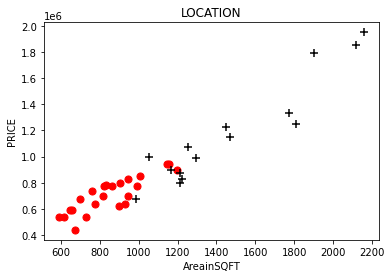

In [56]:
plot_scatter_chart(df6,"Putney")

In [57]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for Location,Location_df in df.groupby("Location"):
        Bedroom_stats={}
        for Bedroom,Bedroom_df in Location_df.groupby("Bedroom"):
            Bedroom_stats[Bedroom]={
            "mean":np.mean(Bedroom_df.price_per_sqft),
            "std":np.std(Bedroom_df.price_per_sqft),
            "count":Bedroom_df.shape[0]
            }
        for Bedroom,Bedroom_df in Location_df.groupby("Bedroom"):
            stats=Bedroom_stats.get(Bedroom-1)
            
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,Bedroom_df[Bedroom_df.price_per_sqft<(stats["mean"])].index.values)
                
    return df.drop(exclude_indices,axis="index")


In [58]:
df7=remove_bhk_outliers(df6)
df7.shape

(1340, 10)

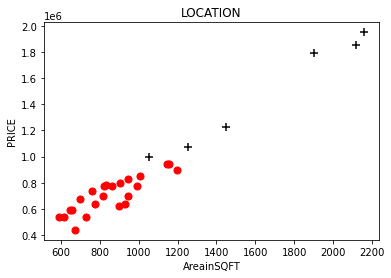

In [59]:
plot_scatter_chart(df7,"Putney")

### After removed some of the said outliers a standard deviation is formed

Text(0, 0.5, 'COUNT')

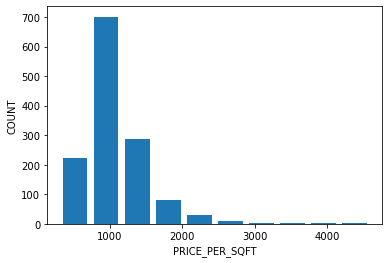

In [60]:
import matplotlib
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("PRICE_PER_SQFT")
plt.ylabel("COUNT")

In [61]:
df7.head()

,Property Name,Price,AreainSQFT,Bedroom,Bathroom,Location,City/County,Postal Code,price_in_million,price_per_sqft
0,Castelnau Court,575000,793,3.0,3.0,Barnes,London,SW13 9DH,0.575,725.094578
1,Carmichael Court,685000,783,3.0,3.0,Barnes,London,SW13 0HA,0.685,874.840358
2,Richard Burbidge Mansions,1700000,1796,3.0,3.0,Barnes,London,SW13 8RB,1.700,946.547884
3,The Old Sorting Office,700000,736,1.0,1.0,Barnes,London,SW13 0LF,0.700,951.086957
4,William Hunt Mansions,1150000,1349,2.0,2.0,Barnes,London,SW13 8HS,1.150,852.483321


### Step 4.8 : Removing various other columns for model building

In [62]:
df7=df6.drop(["price_per_sqft", "Postal Code" ,"Property Name" ,"City/County", "price_in_million"],axis="columns")
df7.head()

,Price,AreainSQFT,Bedroom,Bathroom,Location
0,575000,793,3.0,3.0,Barnes
1,685000,783,3.0,3.0,Barnes
2,1700000,1796,3.0,3.0,Barnes
3,700000,736,1.0,1.0,Barnes
4,1150000,1349,2.0,2.0,Barnes


In [63]:
df7.shape

(1866, 5)

In [64]:
df8 = df7.copy()

In [65]:
df8.describe()

,Price,AreainSQFT,Bedroom,Bathroom
count,1.866000e+03,1866.000000,1866.000000,1866.000000
mean,1.605539e+06,1625.708467,3.013398,3.013398
std,1.597997e+06,1309.871592,1.495062,1.495062
min,2.100000e+05,274.000000,0.000000,0.000000
25%,6.999500e+05,798.250000,2.000000,2.000000
50%,1.125000e+06,1213.500000,3.000000,3.000000
75%,2.000000e+06,2046.250000,4.000000,4.000000
max,2.395000e+07,15405.000000,7.000000,7.000000


<AxesSubplot:xlabel='Price'>

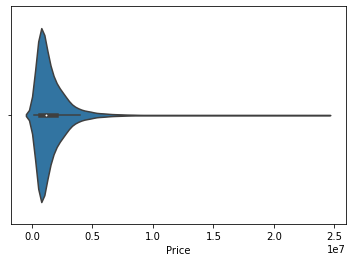

In [66]:
sns.violinplot(data=df8, x="Price" , fmt = "g")

<AxesSubplot:xlabel='Price'>

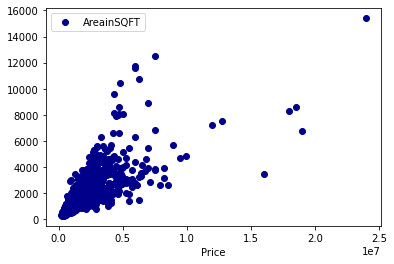

In [67]:
df8.plot(x='Price', y='AreainSQFT', style='o' ,c='DarkBlue' )

### Step 5 : Creating Dummies for the location¶

In [68]:
dummies=pd.get_dummies(df8.Location)
dummies.head()

,Barnes,Battersea,Canary Wharf,Chelsea,Chiswick,Clerkenwell,Coulsdon,Ealing,Earls Court,East Molesey,...,St John's Wood,St. John's Wood,Surbiton,Thames Ditton,Wandsworth,Water Lane,Westminster,Wimbledon,Woodford Green,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df9=pd.concat([df8,dummies.drop("other",axis="columns")],axis="columns")
df9.head()

,Price,AreainSQFT,Bedroom,Bathroom,Location,Barnes,Battersea,Canary Wharf,Chelsea,Chiswick,...,St James's,St John's Wood,St. John's Wood,Surbiton,Thames Ditton,Wandsworth,Water Lane,Westminster,Wimbledon,Woodford Green
0,575000,793,3.0,3.0,Barnes,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,685000,783,3.0,3.0,Barnes,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1700000,1796,3.0,3.0,Barnes,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,700000,736,1.0,1.0,Barnes,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1150000,1349,2.0,2.0,Barnes,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df9.shape

(1866, 93)

### After creating dummies we drop the location column

In [71]:
df10=df9.drop("Location", axis="columns")
df10.head()

,Price,AreainSQFT,Bedroom,Bathroom,Barnes,Battersea,Canary Wharf,Chelsea,Chiswick,Clerkenwell,...,St James's,St John's Wood,St. John's Wood,Surbiton,Thames Ditton,Wandsworth,Water Lane,Westminster,Wimbledon,Woodford Green
0,575000,793,3.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,685000,783,3.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1700000,1796,3.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,700000,736,1.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1150000,1349,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df10.shape

(1866, 92)

### Step 6 : Model Building

### Step 6.1 : Splitting Training set and test set

In [73]:
x=df10.drop("Price",axis="columns")
x.head()

,AreainSQFT,Bedroom,Bathroom,Barnes,Battersea,Canary Wharf,Chelsea,Chiswick,Clerkenwell,Coulsdon,...,St James's,St John's Wood,St. John's Wood,Surbiton,Thames Ditton,Wandsworth,Water Lane,Westminster,Wimbledon,Woodford Green
0,793,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,783,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1796,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,736,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1349,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y=df10.Price
y.head()

0     575000
1     685000
2    1700000
3     700000
4    1150000
Name: Price, dtype: int64

### Considering 75% for training and 25 % for testing

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

### Step 6.2 : Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)


LinearRegression()

In [77]:
print('R squared training set : ', round(lr_clf.score(x_train, y_train)*100, 2))
print('R squared test set : ', round(lr_clf.score(x_test, y_test)*100, 2))

R squared training set :  82.68
R squared test set :  84.7


### Step 6.3 : Decision tree Regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [79]:
print('R squared training set : ', round(dtr.score(x_train, y_train)*100, 2))
print('R squared test set : ', round(dtr.score(x_test, y_test)*100, 2))

R squared training set :  99.94
R squared test set :  78.52


### Step 6.4 : Lasso Regression

In [80]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(x_train, y_train)

Lasso(alpha=1)

In [81]:
print('R squared training set', round(reg.score(x_train, y_train)*100, 2))
print('R squared test set', round(reg.score(x_test, y_test)*100, 2))

R squared training set 82.68
R squared test set 84.7


### Step 7 : K Fold Cross Validation

### We shuffle the data to make a very even and effecient prediction

In [82]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.76944168, 0.82364859, 0.80857668, 0.79183952, 0.79979947])

In [83]:
cross_val_score(Lasso(),x,y,cv=cv)

array([0.7694462 , 0.82364736, 0.80858054, 0.79184593, 0.79980399])

In [84]:
cross_val_score(DecisionTreeRegressor(),x,y,cv=cv)

array([0.70499489, 0.80270472, 0.55621021, 0.71785686, 0.77179405])

### Step 8 : Hyperparameter Tuning - GridSearch

### After shuffle split to create a very effecidnt prediction we attempe to do Hyperparameter Tuning unsing GridSearchCV to improve the efficiency of the model for deployment.

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

def find_best_model_using_gridsearchcv(x,y):
    algos={
        "linear_regressor":{
            "model":LinearRegression(),
            "parms":{
                "normalize":[True,False]
            }
        },
        "lasso":{
            "model":Lasso(),
            "parms":{
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
       },          
       "decision_tree":{
            "model":DecisionTreeRegressor(),
            "parms":{
                "criterion":["mse","freidman_mse"],
                "splitter":["best","random"]
            }
       } 
    }
    
    scores=[]
    
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        
        gs=GridSearchCV(config["model"],config["parms"],cv=cv,return_train_score=False)
        gs.fit(x,y)
        
        scores.append({
            
            "model":algo_name,
            
            "best_score":gs.best_score_,
            
            "best_parms":gs.best_params_
        
        
        })
    return pd.DataFrame(scores,columns=["model","best_score","best_parms"])


find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_parms
0,linear_regressor,0.798661,{'normalize': True}
1,lasso,0.798668,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.688520,"{'criterion': 'mse', 'splitter': 'best'}"


### Step 9 : Comparing Original and Predicted data

In [86]:
y_pred = dtr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  572726019390.4103
RMSE:  286363009695.20514


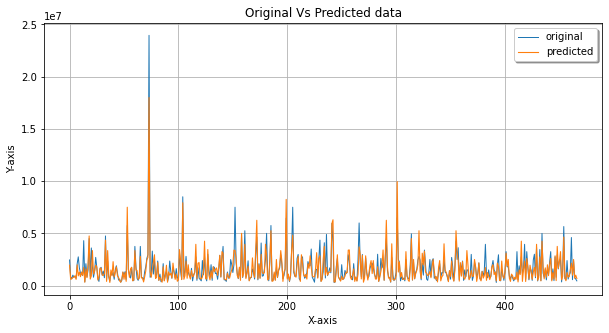

In [87]:
x_ax = range(len(y_test))
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("Original Vs Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Step 10 : Model Deployment using the best model.

In [88]:
x.columns

Index(['AreainSQFT', 'Bedroom', 'Bathroom', ' Barnes', ' Battersea',
       ' Canary Wharf', ' Chelsea', ' Chiswick', ' Clerkenwell', ' Coulsdon',
       ' Ealing', ' Earls Court', ' East Molesey', ' Esher', ' Fitzrovia',
       ' Fulham', ' Greenwich', ' Hampstead', ' Holloway', ' Islington',
       ' London', ' Loughton', ' Maida Vale', ' Marylebone', ' Northwood',
       ' Putney', ' Richmond', ' Shoreditch', ' St John's Wood',
       ' St. John's Wood', ' Wandsworth', ' Westminster', ' Wimbledon',
       '101 Wood Lane', '63 Mortlake High Street', '82-88 Fulham High Street',
       'Barnes', 'Barnsbury', 'Battersea', 'Belgravia', 'Belsize Park',
       'Camden', 'Canary Wharf', 'Canonbury', 'Chelsea', 'Chiswick', 'Clapham',
       'Clerkenwell', 'De Beauvoir', 'Ealing', 'East Molesey', 'East Sheen',
       'Esher', 'Fitzrovia', 'Fulham', 'Hackney', 'Hampstead', 'Highbury',
       'Highgate', 'Islington', 'Kensington', 'Kentish Town',
       'Kingston upon Thames', 'Knightsbridge', 

In [89]:
np.where(x.columns =="Putney")[0][0]

75

### Linear regressiion is the best model hence we deploy it

In [90]:
#WE SEE LINEAR REGRESSION IS THE BEST WITH NORMALIZE=TRUE
def predict_price(Location,AreainSQFT,Bathroom,Bedroom):
    
    loc_index=np.where(x.columns==Location)[0][0]
    
    z=np.zeros(len(x.columns))
    
    z[0]=AreainSQFT
    z[1]=Bathroom
    z[2]=Bedroom
    
    if loc_index>=0:
        
        z[loc_index]=1
        
        
    return lr_clf.predict([z])[0]


In [91]:
Price = predict_price("Putney",2000,4,4)

Price

1634319.6862044318

In [92]:
Price = predict_price("Putney",2500,5,5)

Price

2118513.6862044316

In [93]:
Price_in_millions = "The cost of house is: " + str(round(Price/1000000,2)) + " million" 
Price_in_millions

'The cost of house is: 2.12 million'